In [ ]:
import json
from transformers import AutoTokenizer
import numpy as np

# tokenizer=AutoTokenizer.from_pretrained("/home/majunjie/code/weights/hf/Meta-Llama-3.1-8B-Instruct/")
# jsonl_file = "/home/majunjie/code/EAGLE/output/mt-bench/llama3.1.jsonl"
# jsonl_file = "/home/majunjie/code/EAGLE/output/mt-bench/llama3.1-d7.jsonl"
# jsonl_file_base = "/home/majunjie/code/EAGLE/output/mt-bench/llama3.1-vanilla.jsonl"
jsonl_file = "../output/shareGPT/llama3.1/t1d7/hawkeye-speedtest.jsonl"
jsonl_file_base = "../output/shareGPT/llama3.1/t1d7/eagle3-speedtest.jsonl"
data = []
with open(jsonl_file, 'r', encoding='utf-8') as file:
    for line in file:
        json_obj = json.loads(line)
        data.append(json_obj)



speeds=[]
for datapoint in data:
    qid=datapoint["question_id"]
    answer=datapoint["choices"][0]['turns']
    tokens=sum(datapoint["choices"][0]['new_tokens'])
    times = sum(datapoint["choices"][0]['wall_time'])
    speeds.append(tokens/times)


data = []
with open(jsonl_file_base, 'r', encoding='utf-8') as file:
    for line in file:
        json_obj = json.loads(line)
        data.append(json_obj)


# total_time=0
# total_token=0
speeds0=[]
for datapoint in data:
    qid=datapoint["question_id"]
    answer=datapoint["choices"][0]['turns']
    tokens=sum(datapoint["choices"][0]['new_tokens'])
    times = sum(datapoint["choices"][0]['wall_time'])
    speeds0.append(tokens/times)
    # qid=datapoint["question_id"]
    # answer=datapoint["choices"][0]['turns']
    # tokens = 0
    # for i in answer:
    #     tokens += (len(tokenizer(i).input_ids) - 1)
    # times = sum(datapoint["choices"][0]['wall_time'])
    # speeds0.append(tokens / times)
    # total_time+=times
    # total_token+=tokens



print('speed',np.array(speeds).mean())
print('speed0',np.array(speeds0).mean())
print("ratio",np.array(speeds).mean()/np.array(speeds0).mean())




speed 41.84736954579986
speed0 48.52246169926089
ratio 0.8624329450794804


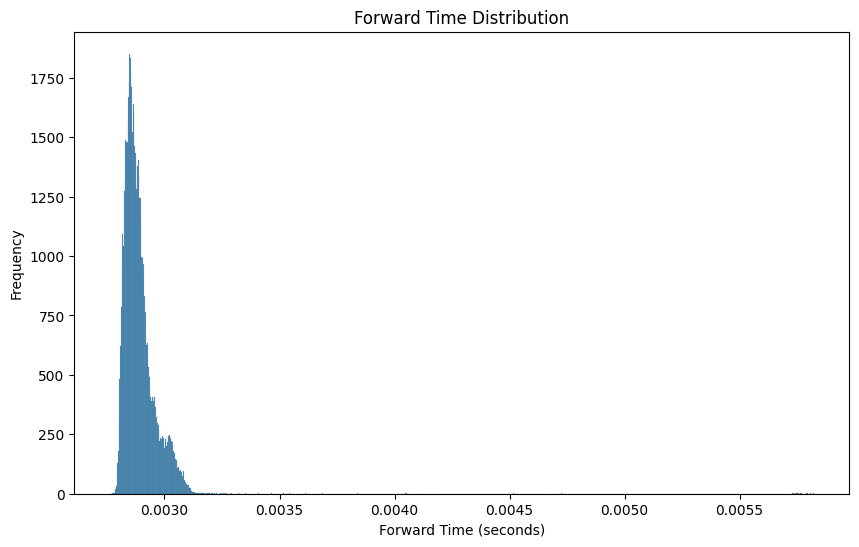

Forward time mean: 0.0028898658820321775
Forward time std: 8.18366473136274e-05
Forward time max: 0.005824089050292969
Forward time min: 0.0027616024017333984
Forward time median: 0.0028734207153320312


In [5]:
import json
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

jsonl_file = "../output/shareGPT/llama3.1/t1d7/eagle3-forward-time.jsonl"
data = []
with open(jsonl_file, 'r', encoding='utf-8') as file:
    for line in file:
        json_obj = json.loads(line)
        data.append(json_obj)

forward_times = []
for datapoint in data:
    for tl in datapoint["choices"]:
        forward_times.extend(tl)

plt.figure(figsize=(10, 6))
plt.title("Forward Time Distribution")
plt.xlabel("Forward Time (seconds)")
plt.ylabel("Frequency")
sns.histplot(forward_times, bins=1000)

plt.show()

print("Forward time mean:", np.mean(forward_times))
print("Forward time std:", np.std(forward_times))
print("Forward time max:", np.max(forward_times))
print("Forward time min:", np.min(forward_times))
print("Forward time median:", np.median(forward_times))
    

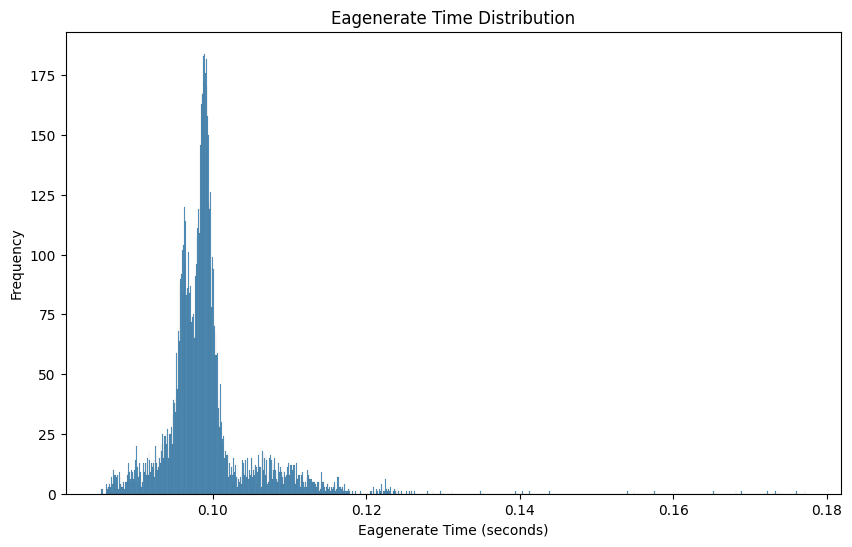

Eagenerate time mean: 0.09917000072350568
Eagenerate time std: 0.005888537566142132
Eagenerate time max: 0.1772315502166748
Eagenerate time min: 0.0854346752166748
Eagenerate time median: 0.09857535362243652


In [6]:
import json
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

jsonl_file = "../output/shareGPT/llama3.1/t1d7/eagle3-eagen-time.jsonl"
data = []
with open(jsonl_file, 'r', encoding='utf-8') as file:
    for line in file:
        json_obj = json.loads(line)
        data.append(json_obj)

eagenerate_time = []
for datapoint in data:
    for tl in datapoint["choices"]:
        eagenerate_time.extend(tl)

plt.figure(figsize=(10, 6))
plt.title("Eagenerate Time Distribution")
plt.xlabel("Eagenerate Time (seconds)")
plt.ylabel("Frequency")
sns.histplot(eagenerate_time, bins=1000)

plt.show()

print("Eagenerate time mean:", np.mean(eagenerate_time))
print("Eagenerate time std:", np.std(eagenerate_time))
print("Eagenerate time max:", np.max(eagenerate_time))
print("Eagenerate time min:", np.min(eagenerate_time))
print("Eagenerate time median:", np.median(eagenerate_time))
    

In [7]:
public_time = np.mean(eagenerate_time) - 7 * np.mean(forward_times)
single_forward_time = np.mean(forward_times)

In [8]:
public_time

0.07894093954928044

In [9]:
single_forward_time

0.0028898658820321775

In [10]:
public_time / single_forward_time

27.31647168821846